In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

# Incidence des syndromes grippaux

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [19]:
data_file = "incidence-PAY-3(1).csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [2]:
data_url="https://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

In [5]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202102          3   20825   16063.0   25587.0      32        25.0   
1     202101          3   22841   18645.0   27037.0      35        29.0   
2     202053          3   21220   16498.0   25942.0      32        25.0   
3     202052          3   16428   12285.0   20571.0      25        19.0   
4     202051          3   21619   17370.0   25868.0      33        27.0   
5     202050          3   16845   13220.0   20470.0      26        20.0   
6     202049          3   12939    9923.0   15955.0      20        15.0   
7     202048          3   13804   10641.0   16967.0      21        16.0   
8     202047          3   19085   15285.0   22885.0      29        23.0   
9     202046          3   24801   20503.0   29099.0      38        31.0   
10    202045          3   42516   36857.0   48175.0      65        56.0   
11    202044          3   44567   38521.0   50613.0      68        59.0   
12    202043          3   43737   37523.0   49951.0      66        57.0   
13    202042          3   35145   29812.0   40478.0      53        45.0   
14    202041          3   27877   23206.0   32548.0      42        35.0   
15    202040          3   20443   16381.0   24505.0      31        25.0   
16    202039          3   19810   15900.0   23720.0      30        24.0   
17    202038          3   25562   21142.0   29982.0      39        32.0   
18    202037          3   18485   14649.0   22321.0      28        22.0   
19    202036          3   10390    7646.0   13134.0      16        12.0   
20    202035          3    9918    6842.0   12994.0      15        10.0   
21    202034          3    6084    3090.0    9078.0       9         4.0   
22    202033          3    6106    3411.0    8801.0       9         5.0   
23    202032          3    5918    3330.0    8506.0       9         5.0   
24    202031          3    4351    2269.0    6433.0       7         4.0   
25    202030          3    8179    5442.0   10916.0      12         8.0   
26    202029          3    8687    5860.0   11514.0      13         9.0   
27    202028          3    8340    5701.0   10979.0      13         9.0   
28    202027          3    4066    2406.0    5726.0       6         3.0   
29    202026          3    4039    2389.0    5689.0       6         3.0   
...      ...        ...     ...       ...       ...     ...         ...   
1860  198521          3   26096   19621.0   32571.0      47        35.0   
1861  198520          3   27896   20885.0   34907.0      51        38.0   
1862  198519          3   43154   32821.0   53487.0      78        59.0   
1863  198518          3   40555   29935.0   51175.0      74        55.0   
1864  198517          3   34053   24366.0   43740.0      62        44.0   
1865  198516          3   50362   36451.0   64273.0      91        66.0   
1866  198515          3   63881   45538.0   82224.0     116        83.0   
1867  198514          3  134545  114400.0  154690.0     244       207.0   
1868  198513          3  197206  176080.0  218332.0     357       319.0   
1869  198512          3  245240  223304.0  267176.0     445       405.0   
1870  198511          3  276205  252399.0  300011.0     501       458.0   
1871  198510          3  353231  326279.0  380183.0     640       591.0   
1872  198509          3  369895  341109.0  398681.0     670       618.0   
1873  198508          3  389886  359529.0  420243.0     707       652.0   
1874  198507          3  471852  432599.0  511105.0     855       784.0   
1875  198506          3  565825  518011.0  613639.0    1026       939.0   
1876  198505          3  637302  592795.0  681809.0    1155      1074.0   
1877  198504          3  424937  390794.0  459080.0     770       708.0   
1878  198503          3  213901  174689.0  253113.0     388       317.0   
1879  198502          3   97586   80949.0  114223.0     177       147.0   
1880  198501          3   85489   65918.0  105060.0     155       120.0   
1881  198452          3   84830  

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1653  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1653        FR   France

Cette ligne sera exclue de notre analyse car elle ne contient pas de données.

In [7]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202102          3   20825   16063.0   25587.0      32        25.0   
1     202101          3   22841   18645.0   27037.0      35        29.0   
2     202053          3   21220   16498.0   25942.0      32        25.0   
3     202052          3   16428   12285.0   20571.0      25        19.0   
4     202051          3   21619   17370.0   25868.0      33        27.0   
5     202050          3   16845   13220.0   20470.0      26        20.0   
6     202049          3   12939    9923.0   15955.0      20        15.0   
7     202048          3   13804   10641.0   16967.0      21        16.0   
8     202047          3   19085   15285.0   22885.0      29        23.0   
9     202046          3   24801   20503.0   29099.0      38        31.0   
10    202045          3   42516   36857.0   48175.0      65        56.0   
11    202044          3   44567   38521.0   50613.0      68        59.0   
12    202043          3   43737   37523.0   49951.0      66        57.0   
13    202042          3   35145   29812.0   40478.0      53        45.0   
14    202041          3   27877   23206.0   32548.0      42        35.0   
15    202040          3   20443   16381.0   24505.0      31        25.0   
16    202039          3   19810   15900.0   23720.0      30        24.0   
17    202038          3   25562   21142.0   29982.0      39        32.0   
18    202037          3   18485   14649.0   22321.0      28        22.0   
19    202036          3   10390    7646.0   13134.0      16        12.0   
20    202035          3    9918    6842.0   12994.0      15        10.0   
21    202034          3    6084    3090.0    9078.0       9         4.0   
22    202033          3    6106    3411.0    8801.0       9         5.0   
23    202032          3    5918    3330.0    8506.0       9         5.0   
24    202031          3    4351    2269.0    6433.0       7         4.0   
25    202030          3    8179    5442.0   10916.0      12         8.0   
26    202029          3    8687    5860.0   11514.0      13         9.0   
27    202028          3    8340    5701.0   10979.0      13         9.0   
28    202027          3    4066    2406.0    5726.0       6         3.0   
29    202026          3    4039    2389.0    5689.0       6         3.0   
...      ...        ...     ...       ...       ...     ...         ...   
1860  198521          3   26096   19621.0   32571.0      47        35.0   
1861  198520          3   27896   20885.0   34907.0      51        38.0   
1862  198519          3   43154   32821.0   53487.0      78        59.0   
1863  198518          3   40555   29935.0   51175.0      74        55.0   
1864  198517          3   34053   24366.0   43740.0      62        44.0   
1865  198516          3   50362   36451.0   64273.0      91        66.0   
1866  198515          3   63881   45538.0   82224.0     116        83.0   
1867  198514          3  134545  114400.0  154690.0     244       207.0   
1868  198513          3  197206  176080.0  218332.0     357       319.0   
1869  198512          3  245240  223304.0  267176.0     445       405.0   
1870  198511          3  276205  252399.0  300011.0     501       458.0   
1871  198510          3  353231  326279.0  380183.0     640       591.0   
1872  198509          3  369895  341109.0  398681.0     670       618.0   
1873  198508          3  389886  359529.0  420243.0     707       652.0   
1874  198507          3  471852  432599.0  511105.0     855       784.0   
1875  198506          3  565825  518011.0  613639.0    1026       939.0   
1876  198505          3  637302  592795.0  681809.0    1155      1074.0   
1877  198504          3  424937  390794.0  459080.0     770       708.0   
1878  198503          3  213901  174689.0  253113.0     388       317.0   
1879  198502          3   97586   80949.0  114223.0     177       147.0   
1880  198501          3   85489   65918.0  105060.0     155       120.0   
1881  198452          3   84830  

In [8]:
 def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [9]:
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202102          3   20825   16063.0   25587.0      32        25.0   
1     202101          3   22841   18645.0   27037.0      35        29.0   
2     202053          3   21220   16498.0   25942.0      32        25.0   
3     202052          3   16428   12285.0   20571.0      25        19.0   
4     202051          3   21619   17370.0   25868.0      33        27.0   
5     202050          3   16845   13220.0   20470.0      26        20.0   
6     202049          3   12939    9923.0   15955.0      20        15.0   
7     202048          3   13804   10641.0   16967.0      21        16.0   
8     202047          3   19085   15285.0   22885.0      29        23.0   
9     202046          3   24801   20503.0   29099.0      38        31.0   
10    202045          3   42516   36857.0   48175.0      65        56.0   
11    202044          3   44567   38521.0   50613.0      68        59.0   
12    202043          3   43737   37523.0   49951.0      66        57.0   
13    202042          3   35145   29812.0   40478.0      53        45.0   
14    202041          3   27877   23206.0   32548.0      42        35.0   
15    202040          3   20443   16381.0   24505.0      31        25.0   
16    202039          3   19810   15900.0   23720.0      30        24.0   
17    202038          3   25562   21142.0   29982.0      39        32.0   
18    202037          3   18485   14649.0   22321.0      28        22.0   
19    202036          3   10390    7646.0   13134.0      16        12.0   
20    202035          3    9918    6842.0   12994.0      15        10.0   
21    202034          3    6084    3090.0    9078.0       9         4.0   
22    202033          3    6106    3411.0    8801.0       9         5.0   
23    202032          3    5918    3330.0    8506.0       9         5.0   
24    202031          3    4351    2269.0    6433.0       7         4.0   
25    202030          3    8179    5442.0   10916.0      12         8.0   
26    202029          3    8687    5860.0   11514.0      13         9.0   
27    202028          3    8340    5701.0   10979.0      13         9.0   
28    202027          3    4066    2406.0    5726.0       6         3.0   
29    202026          3    4039    2389.0    5689.0       6         3.0   
...      ...        ...     ...       ...       ...     ...         ...   
1860  198521          3   26096   19621.0   32571.0      47        35.0   
1861  198520          3   27896   20885.0   34907.0      51        38.0   
1862  198519          3   43154   32821.0   53487.0      78        59.0   
1863  198518          3   40555   29935.0   51175.0      74        55.0   
1864  198517          3   34053   24366.0   43740.0      62        44.0   
1865  198516          3   50362   36451.0   64273.0      91        66.0   
1866  198515          3   63881   45538.0   82224.0     116        83.0   
1867  198514          3  134545  114400.0  154690.0     244       207.0   
1868  198513          3  197206  176080.0  218332.0     357       319.0   
1869  198512          3  245240  223304.0  267176.0     445       405.0   
1870  198511          3  276205  252399.0  300011.0     501       458.0   
1871  198510          3  353231  326279.0  380183.0     640       591.0   
1872  198509          3  369895  341109.0  398681.0     670       618.0   
1873  198508          3  389886  359529.0  420243.0     707       652.0   
1874  198507          3  471852  432599.0  511105.0     855       784.0   
1875  198506          3  565825  518011.0  613639.0    1026       939.0   
1876  198505          3  637302  592795.0  681809.0    1155      1074.0   
1877  198504          3  424937  390794.0  459080.0     770       708.0   
1878  198503          3  213901  174689.0  253113.0     388       317.0   
1879  198502          3   97586   80949.0  114223.0     177       147.0   
1880  198501          3   85489   65918.0  105060.0     155       120.0   
1881  198452          3   84830  

In [10]:
sorted_data = data.set_index('period').sort_index()

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


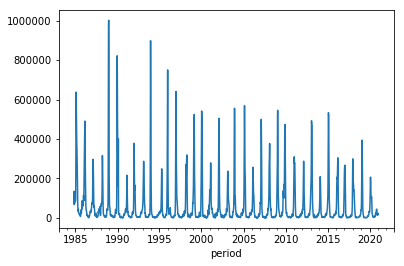

In [12]:
sorted_data['inc'].plot()

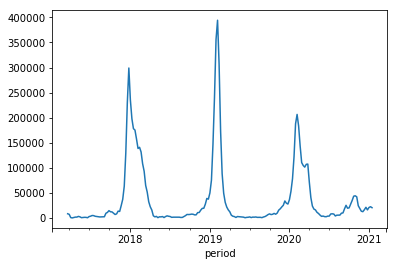

In [13]:
sorted_data['inc'][-200:].plot()

In [14]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

In [15]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

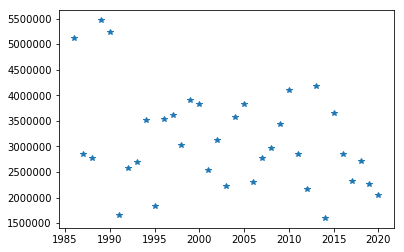

In [16]:
yearly_incidence.plot(style='*')

In [17]:
yearly_incidence.sort_values()

2014    1600941
1991    1659249
1995    1840410
2020    2042389
2012    2175217
2003    2234584
2019    2254386
2006    2307352
2017    2321583
2001    2529279
1992    2574578
1993    2703886
2018    2705325
1988    2765617
2007    2780164
1987    2855570
2016    2856393
2011    2857040
2008    2973918
1998    3034904
2002    3125418
2009    3444020
1994    3514763
1996    3539413
2004    3567744
1997    3620066
2015    3654892
2000    3826372
2005    3835025
1999    3908112
2010    4111392
2013    4182691
1986    5115251
1990    5235827
1989    5466192
dtype: int64

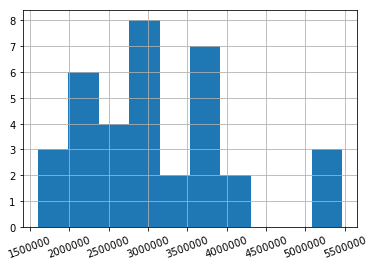

In [18]:
yearly_incidence.hist(xrot=20)